In [7]:
#Import Libraries


import seaborn as sns

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib.dates

from datetime import datetime

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.datasets import load_iris
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [8]:
#Read xls File and Load to a dataframe

df = pd.read_excel('weather2015_2019(1).xlsx')
#print(df)
df = df.drop(columns = df.columns[13:])
df = df.drop(columns = df.columns[0:2])
df = df.dropna()
df

,Station,Date,Time,Barometric Pressure (mbar),Air Temp (°C),RH (%),Dew Point (°C),Rain (mm),Wind Speed (m/s),Wind Direction (ø),Gust Speed (m/s)
0,Clapp-Library,2015-01-01,00:00:00,1024.1,-8.777778,68.0,-13.611111,0.0,0.00000,157.5,1.78816
1,Clapp-Library,2015-01-01,00:30:00,1028.0,-6.555556,49.0,-15.500000,0.0,2.23520,270.0,8.04672
2,Clapp-Library,2015-01-01,01:00:00,1028.2,-6.833333,50.0,-15.555556,0.0,1.78816,247.5,6.25856
3,Clapp-Library,2015-01-01,01:30:00,1029.3,-7.222222,52.0,-15.444444,0.0,3.12928,225.0,6.70560
4,Clapp-Library,2015-01-01,02:00:00,1029.5,-7.000000,53.0,-15.000000,0.0,4.02336,225.0,7.59968
...,...,...,...,...,...,...,...,...,...,...,...
97031,Clapp-Library,2020-07-13,08:30:00,1011.1,23.222222,84.0,20.388889,0.0,0.44704,135.0,1.78816
97032,Clapp-Library,2020-07-13,09:00:00,1011.0,24.611111,76.0,20.111111,0.0,0.00000,135.0,1.34112
97033,Clapp-Library,2020-07-13,09:30:00,1011.1,24.888889,74.0,19.944444,0.0,0.44704,135.0,2.23520
97034,Clapp-Library,2020-07-13,10:00:00,1011.0,26.444444,70.0,20.555556,0.0,0.00000,202.5,1.34112


In [9]:
#cooerce time stamps to str
df['Time'] = df['Time'].astype(str)
#df["Date"] = pd.to_datetime(df["Date"]).dt.date
#df['Barometric Pressure (mbar)'] = df['Barometric Pressure (mbar)'].astype(str)
df.describe()

,Barometric Pressure (mbar),Air Temp (°C),RH (%),Dew Point (°C),Rain (mm),Wind Speed (m/s),Wind Direction (ø),Gust Speed (m/s)
count,84860.000000,84860.000000,84860.000000,84860.000000,84860.000000,84860.000000,84860.000000,84860.000000
mean,1020.288802,10.018659,69.048727,4.092463,0.052497,2.326678,207.855350,5.782999
std,8.501196,10.533485,18.276788,11.026103,0.364100,1.852109,104.181948,3.705477
min,975.600000,-24.555556,13.000000,-32.055556,0.000000,0.000000,0.000000,0.447040
25%,1015.000000,1.777778,55.000000,-4.111111,0.000000,0.894080,157.500000,2.682240
50%,1020.100000,9.722222,70.000000,4.055556,0.000000,1.788160,202.500000,5.364480
75%,1025.700000,18.944444,85.000000,13.444444,0.000000,3.576320,292.500000,8.046720
max,1049.200000,35.888889,100.000000,27.000000,18.034000,12.517120,337.500000,28.163520


In [10]:
#Separate years
#df2014 = df[df["Date"].isin([d.strftime("%Y-%m-%d") for d in pd.date_range("2015-03-01", "2015-04-30")])]
df2015 = df[df["Date"].isin([d.strftime("%Y-%m-%d") for d in pd.date_range("2015-03-01", "2015-04-30")])]
df2016 = df[df["Date"].isin([d.strftime("%Y-%m-%d") for d in pd.date_range("2016-03-01", "2016-04-30")])]
df2017 = df[df["Date"].isin([d.strftime("%Y-%m-%d") for d in pd.date_range("2017-03-01", "2017-04-30")])]
df2018 = df[df["Date"].isin([d.strftime("%Y-%m-%d") for d in pd.date_range("2018-03-01", "2018-04-30")])]
df2019 = df[df["Date"].isin([d.strftime("%Y-%m-%d") for d in pd.date_range("2019-03-01", "2019-04-30")])]
df2020 = df[df["Date"].isin([d.strftime("%Y-%m-%d") for d in pd.date_range("2020-03-01", "2020-04-30")])]
df2015_2018 = pd.concat([df2015,df2016,df2017,df2018])

/var/folders/2r/4zcvy2mx5454t4_ny06j3blc0000gn/T/ipykernel_25628/2306830790.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2015_2018['Barometric Pressure (mbar)'])
/var/folders/2r/4zcvy2mx5454t4_ny06j3blc0000gn/T/ipykernel_25628/2306830790.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distpl

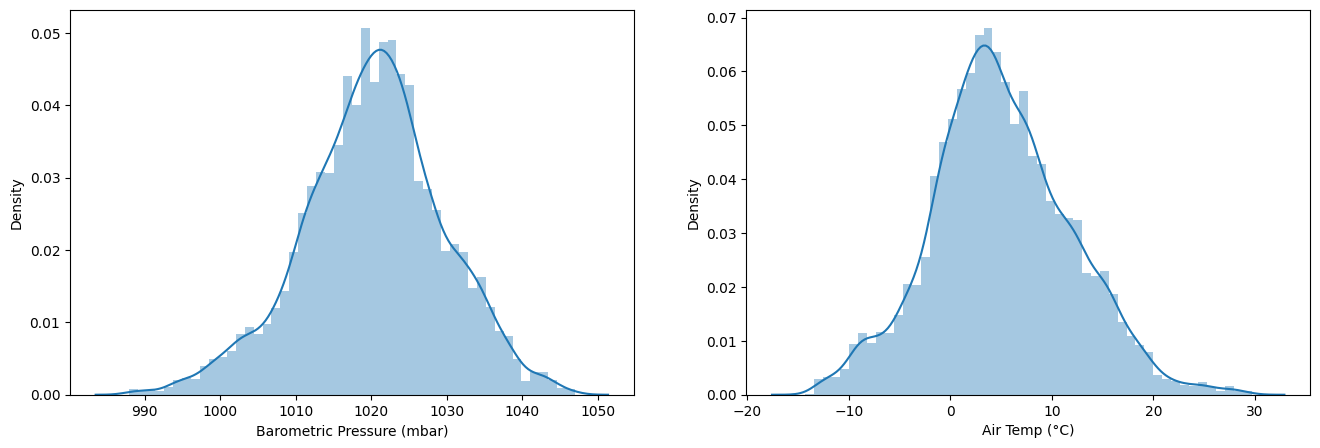

In [11]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df2015_2018['Barometric Pressure (mbar)'])
plt.subplot(1,2,2)
sns.distplot(df2015_2018['Air Temp (°C)'])
plt.show()

<Axes: >

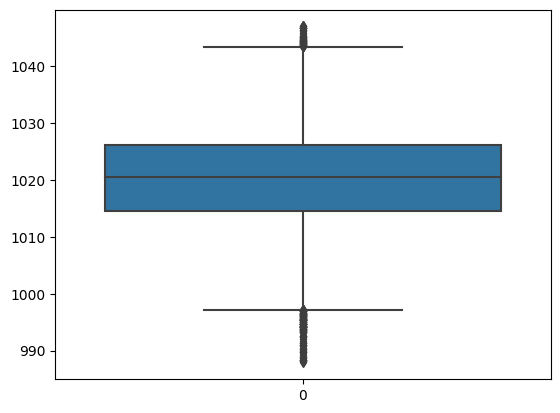

In [12]:
sns.boxplot(df2015_2018['Barometric Pressure (mbar)'].values)

<Axes: >

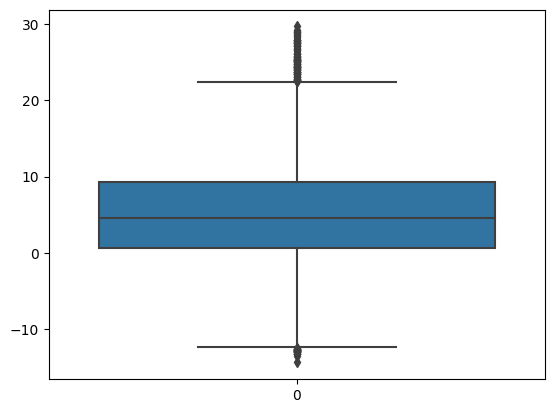

In [13]:
sns.boxplot(df2015_2018['Air Temp (°C)'].values)

### Delet Outlier for Air Temp (°C)

In [14]:
#Finding the IQR
percentile25 = df2015_2018['Air Temp (°C)'].quantile(0.25)
percentile75 = df2015_2018['Air Temp (°C)'].quantile(0.75)

In [15]:
#Finding the upper and lower limits
IQR = percentile75 -percentile25
upper_limit = percentile75 + (1.5 * IQR)
lower_limit = percentile25 - (1.5 * IQR)

In [16]:
#Step-7: Finding outliers
df2015_2018[df2015_2018['Air Temp (°C)'] > upper_limit]
df2015_2018[df2015_2018['Air Temp (°C)'] < lower_limit]

,Station,Date,Time,Barometric Pressure (mbar),Air Temp (°C),RH (%),Dew Point (°C),Rain (mm),Wind Speed (m/s),Wind Direction (ø),Gust Speed (m/s)
2839,Clapp-Library,2015-03-01,03:30:00,1034.9,-12.777778,63.0,-18.388889,0.0,0.89408,315.0,2.68224
2984,Clapp-Library,2015-03-04,04:00:00,1032.2,-13.444444,55.0,-20.555556,0.0,1.78816,315.0,4.02336
2985,Clapp-Library,2015-03-04,04:30:00,1032.3,-13.277778,54.0,-20.611111,0.0,0.00000,315.0,1.34112
2991,Clapp-Library,2015-03-04,07:30:00,1034.2,-14.333333,61.0,-20.222222,0.0,0.00000,292.5,1.78816
3084,Clapp-Library,2015-03-06,06:00:00,1041.2,-12.555556,42.0,-22.833333,0.0,5.36448,315.0,9.83488
3085,Clapp-Library,2015-03-06,06:30:00,1041.7,-12.777778,41.0,-23.333333,0.0,4.47040,337.5,9.83488
3086,Clapp-Library,2015-03-06,07:00:00,1041.6,-12.777778,40.0,-23.611111,0.0,4.47040,337.5,9.83488
3087,Clapp-Library,2015-03-06,07:30:00,1042.0,-12.666667,39.0,-23.777778,0.0,5.36448,337.5,10.28192
38113,Clapp-Library,2017-03-05,00:30:00,1039.1,-12.611111,39.0,-23.722222,0.0,5.81152,315.0,13.41120
38114,Clapp-Library,2017-03-05,01:00:00,1039.3,-12.833333,39.0,-23.944444,0.0,4.47040,337.5,9.38784


In [17]:
#Step-8: Trimming outliers
new_df_2015_2018 = df2015_2018[ df2015_2018['Air Temp (°C)']>lower_limit]
new_df_2015_2018 = new_df_2015_2018[new_df_2015_2018['Air Temp (°C)']<upper_limit]
new_df_2015_2018.shape

(10732, 11)

/var/folders/2r/4zcvy2mx5454t4_ny06j3blc0000gn/T/ipykernel_25628/297868764.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2015_2018['Air Temp (°C)'])
/var/folders/2r/4zcvy2mx5454t4_ny06j3blc0000gn/T/ipykernel_25628/297868764.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_2015_

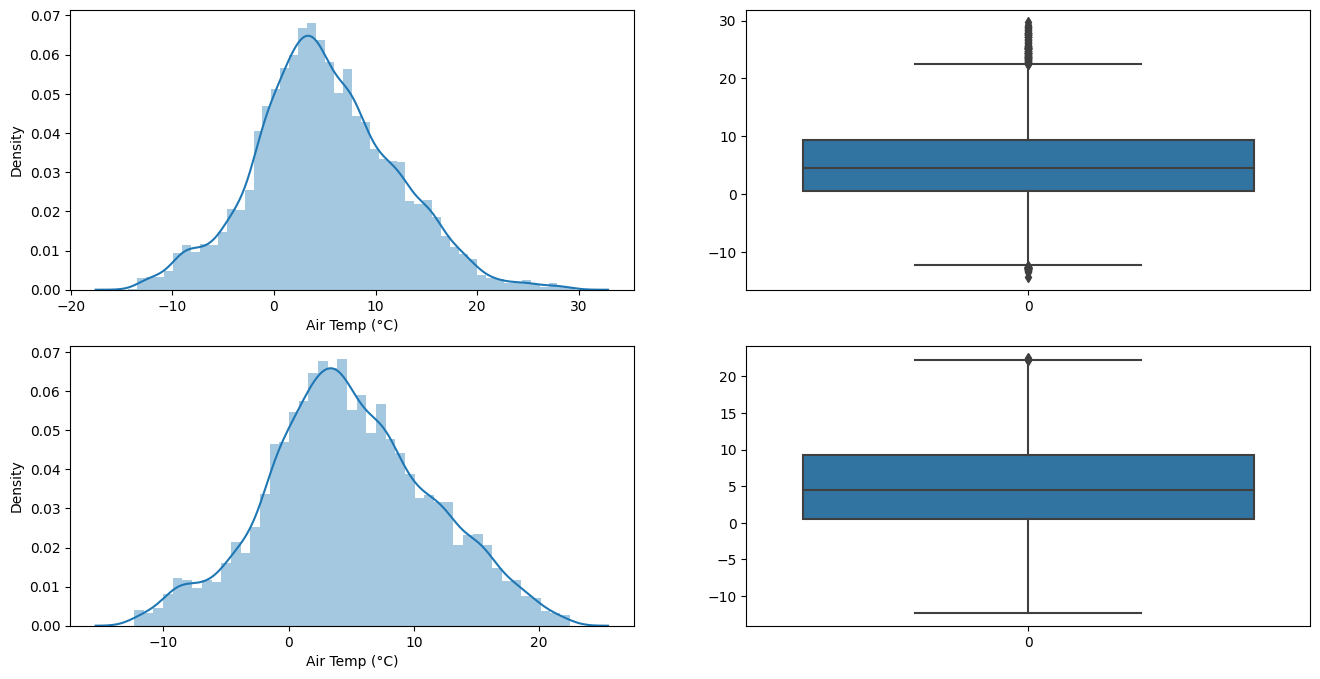

In [18]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df2015_2018['Air Temp (°C)'])
plt.subplot(2,2,2)
sns.boxplot(df2015_2018['Air Temp (°C)'].values)
plt.subplot(2,2,3)
sns.distplot(new_df_2015_2018['Air Temp (°C)'])
plt.subplot(2,2,4)
sns.boxplot(new_df_2015_2018['Air Temp (°C)'].values)
plt.show()

In [19]:
df15_18_noon = new_df_2015_2018[new_df_2015_2018["Time"]== '12:00:00']

### Case 2-'Barometric Pressure (mbar)'

0.006037211170592416
41.76645849052015


Text(0, 0.5, 'Air Temp (°C)')

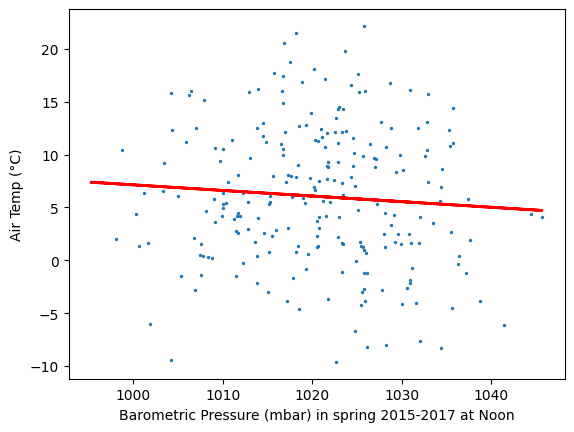

In [20]:
# plot linear regression
pre15_18 = df15_18_noon['Barometric Pressure (mbar)']
temp15_18_noon = df15_18_noon['Air Temp (°C)']

# convert to 2-D array
pre15_18 = pre15_18.to_numpy().reshape(-1,1)
temp15_18_noon = temp15_18_noon.to_numpy().reshape(-1,1)

#make the model
model = LinearRegression()
model.fit(pre15_18,temp15_18_noon)
temp15_18_noon_pred = model.predict(pre15_18)


MSE= mean_squared_error(temp15_18_noon, temp15_18_noon_pred)
R2= r2_score(temp15_18_noon, temp15_18_noon_pred)

print (R2)
print (MSE)


plt.scatter(pre15_18,temp15_18_noon, s=2)
plt.plot(pre15_18, temp15_18_noon_pred, color='red', linewidth=2)
plt.xlabel("Barometric Pressure (mbar) in spring 2015-2017 at Noon")
plt.ylabel("Air Temp (°C)")

0.0246601000201484
36.00010018545179


(array([ 990., 1000., 1010., 1020., 1030., 1040., 1050.]),
 [Text(990.0, 0, '990'),
  Text(1000.0, 0, '1000'),
  Text(1010.0, 0, '1010'),
  Text(1020.0, 0, '1020'),
  Text(1030.0, 0, '1030'),
  Text(1040.0, 0, '1040'),
  Text(1050.0, 0, '1050')])

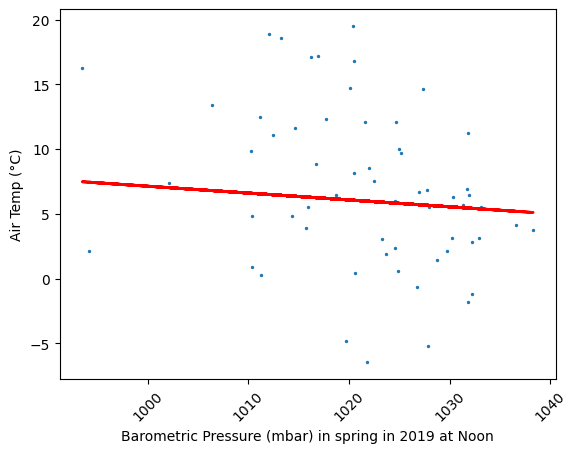

In [21]:
df2019_noon = df2019[df2019["Time"]== '12:00:00']
pre2019_noon = df2019_noon['Barometric Pressure (mbar)']
temp2019_noon = df2019_noon['Air Temp (°C)']

pre2019_noon = pre2019_noon.to_numpy().reshape(-1,1)
temp2019_noon = temp2019_noon.to_numpy().reshape(-1,1)
temp2019_noon_pred = model.predict(pre2019_noon)

MSE= mean_squared_error(temp2019_noon, temp2019_noon_pred)
R2= r2_score(temp2019_noon, temp2019_noon_pred)

print (R2)
print (MSE)
#draw scatter plot
plt.scatter(pre2019_noon, temp2019_noon, s = 2)
plt.plot(pre2019_noon, temp2019_noon_pred, color='red', linewidth=2)
plt.xlabel("Barometric Pressure (mbar) in spring in 2019 at Noon")
plt.ylabel("Air Temp (°C)")
plt.xticks(rotation=45)


### Case 1: Date

0.06196425643752901
39.41639605267988


Text(0, 0.5, 'Air Temp (°C)')

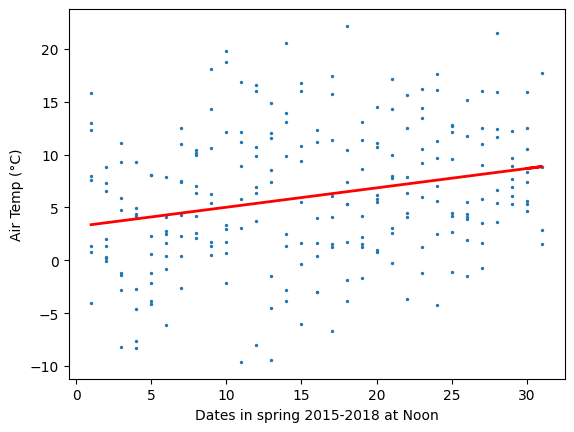

In [22]:

#Plot dates by temps for 2015-2018
date15_18_noon = df15_18_noon['Date']
temp15_18_noon = df15_18_noon['Air Temp (°C)']

date15_18_noon = date15_18_noon.astype(str)
date15_18_noon = date15_18_noon.str.split("-").str[-1].astype(int)

date15_18_noon = date15_18_noon.to_numpy().reshape(-1,1)
temp15_18_noon = temp15_18_noon.to_numpy().reshape(-1,1)

#make the model
model = LinearRegression()
model.fit(date15_18_noon,temp15_18_noon)
temp15_18_noon_pred = model.predict(date15_18_noon)

MSE= mean_squared_error(temp15_18_noon, temp15_18_noon_pred)
R2= r2_score(temp15_18_noon, temp15_18_noon_pred)

print (R2)
print (MSE)

#draw scatter plot
plt.scatter(date15_18_noon,temp15_18_noon, s=2)
plt.plot(date15_18_noon, temp15_18_noon_pred, color='red', linewidth=2)
plt.xlabel("Dates in spring 2015-2018 at Noon")
plt.ylabel("Air Temp (°C)")


0.12649144009188895
32.241473634157


Text(0, 0.5, 'Air Temp (°C)')

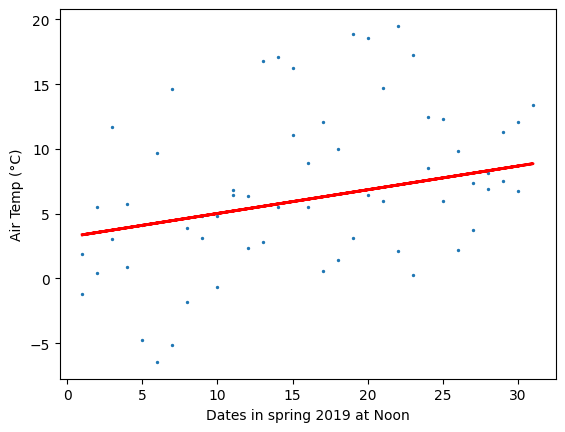

In [23]:
##Plot dates by temps for 2020
df2019_noon = df2019[df2019["Time"]== '12:00:00']
date2019_noon = df2019_noon['Date']
temp2019_noon = df2019_noon['Air Temp (°C)']

date2019_noon = date2019_noon.astype(str)
date2019_noon = date2019_noon.str.split("-").str[-1].astype(int)

# convert to 2-D array
date2019_noon = date2019_noon.to_numpy().reshape(-1,1)
temp2019_noon = temp2019_noon.to_numpy().reshape(-1,1)

# predict 2020 air temperature at noon
temp2019_noon_pred = model.predict(date2019_noon)

MSE= mean_squared_error(temp2019_noon, temp2019_noon_pred)
R2= r2_score(temp2019_noon, temp2019_noon_pred)

print (R2)
print (MSE)

# draw scatter plot
plt.scatter(date2019_noon,temp2019_noon, s=2)
plt.plot(date2019_noon, temp2019_noon_pred, color='red', linewidth=2)
plt.xlabel("Dates in spring 2019 at Noon")
plt.ylabel("Air Temp (°C)")

### Case 3- Gust Speed (m/s)

0.028302579341202172
40.830864536777554


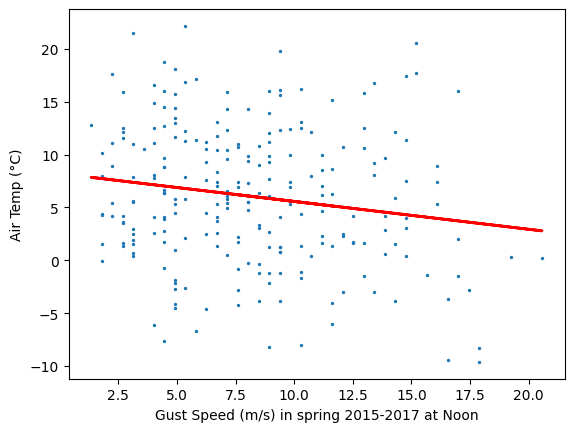

In [24]:
# plot linear regression
gSpeed15_18 = df15_18_noon[['Gust Speed (m/s)']]
temp15_18_noon = df15_18_noon['Air Temp (°C)']


# convert to 2-D array
gSpeed15_18 = gSpeed15_18.to_numpy().reshape(-1,1)
temp15_18_noon = temp15_18_noon.to_numpy().reshape(-1,1)

#make the model
model = LinearRegression()
model.fit(gSpeed15_18,temp15_18_noon)
temp15_18_noon_pred = model.predict(gSpeed15_18)

plt.scatter(gSpeed15_18,temp15_18_noon, s=2)
plt.plot(gSpeed15_18, temp15_18_noon_pred, color='red', linewidth=2)
plt.xlabel("Gust Speed (m/s) in spring 2015-2017 at Noon")
plt.ylabel("Air Temp (°C)")

MSE= mean_squared_error(temp15_18_noon, temp15_18_noon_pred)
R2= r2_score(temp15_18_noon, temp15_18_noon_pred)

print (R2)
print (MSE)


-0.010373998769027448
37.293219708546665


(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18.]),
 [Text(0.0, 0, '0'),
  Text(2.0, 0, '2'),
  Text(4.0, 0, '4'),
  Text(6.0, 0, '6'),
  Text(8.0, 0, '8'),
  Text(10.0, 0, '10'),
  Text(12.0, 0, '12'),
  Text(14.0, 0, '14'),
  Text(16.0, 0, '16'),
  Text(18.0, 0, '18')])

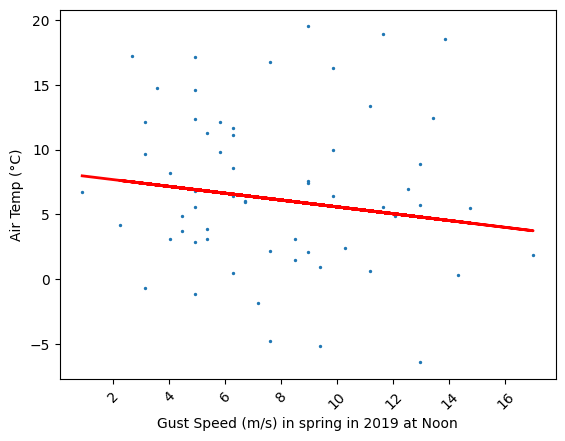

In [25]:
df2019_noon = df2019[df2019["Time"]== '12:00:00']
gSpeed2019_noon = df2019_noon['Gust Speed (m/s)']
temp2019_noon = df2019_noon['Air Temp (°C)']

gSpeed2019_noon = gSpeed2019_noon.to_numpy().reshape(-1,1)
temp2019_noon = temp2019_noon.to_numpy().reshape(-1,1)
temp2019_noon_pred = model.predict(gSpeed2019_noon)

MSE= mean_squared_error(temp2019_noon, temp2019_noon_pred)
R2= r2_score(temp2019_noon, temp2019_noon_pred)

print (R2)
print (MSE)
#draw scatter plot
plt.scatter(gSpeed2019_noon, temp2019_noon, s = 2)
plt.plot(gSpeed2019_noon, temp2019_noon_pred, color='red', linewidth=2)
plt.xlabel("Gust Speed (m/s) in spring in 2019 at Noon")
plt.ylabel("Air Temp (°C)")
plt.xticks(rotation=45)

### Case 4 : Barometric Pressure (mbar) and Gust Speed (m/s)

In [26]:
# plot linear regression
pre_sp15_18 = df15_18_noon[['Barometric Pressure (mbar)','Gust Speed (m/s)']]
temp15_18_noon = df15_18_noon['Air Temp (°C)']

# convert to 2-D array
pre_sp15_18 = pre_sp15_18.to_numpy().reshape(-1,2)
temp15_18_noon = temp15_18_noon.to_numpy().reshape(-1,1)

#make the model
model = LinearRegression()
model.fit(pre_sp15_18,temp15_18_noon)
temp15_18_noon_pred = model.predict(pre_sp15_18)


MSE= mean_squared_error(temp15_18_noon, temp15_18_noon_pred)
R2= r2_score(temp15_18_noon, temp15_18_noon_pred)

print (R2)


0.04323073904294206


In [27]:
##Plot dates by temps for 2020

df2019_noon = df2019[df2019["Time"]== '12:00:00']
pre_gs2019_noon = df2019_noon[['Barometric Pressure (mbar)','Gust Speed (m/s)']]
temp2019_noon = df2019_noon['Air Temp (°C)']

pre_gs2019_noon = pre_gs2019_noon.to_numpy().reshape(-1,2)
temp2019_noon = temp2019_noon.to_numpy().reshape(-1,1)
temp2019_noon_pred = model.predict(pre_gs2019_noon)

MSE= mean_squared_error(temp2019_noon, temp2019_noon_pred)
R2= r2_score(temp2019_noon, temp2019_noon_pred)

print (R2)
print (MSE)

0.06306568306136573
34.58253812611938


### Case 5: Barometric Pressure (mbar), Gust Speed (m/s), Wind Speed (m/s)

In [28]:
# plot linear regression

pre_sg_ws15_18 = df15_18_noon[['Barometric Pressure (mbar)','Gust Speed (m/s)','Wind Speed (m/s)']]
temp15_18_noon = df15_18_noon['Air Temp (°C)']

# convert to 2-D array
pre_sg_ws15_18 = pre_sg_ws15_18.to_numpy().reshape(-1,3)
temp15_18_noon = temp15_18_noon.to_numpy().reshape(-1,1)

#make the model
model = LinearRegression()
model.fit(pre_sg_ws15_18,temp15_18_noon)
temp15_18_noon_pred = model.predict(pre_sg_ws15_18)


MSE= mean_squared_error(temp15_18_noon, temp15_18_noon_pred)
R2= r2_score(temp15_18_noon, temp15_18_noon_pred)

print (R2)
print (MSE)

0.05223258369520822
39.82532233262056


In [29]:
df2019_noon = df2019[df2019["Time"]== '12:00:00']
pre_gs_ws2019_noon = df2019_noon[['Barometric Pressure (mbar)','Gust Speed (m/s)','Wind Speed (m/s)']]
temp2019_noon = df2019_noon['Air Temp (°C)']

# date2020_noon = pre2020_noon.astype(str)
# date2020_noon = date2020_noon.str.split("-").str[-1].astype(int)
pre_gs_ws2019_noon = pre_gs_ws2019_noon.to_numpy().reshape(-1,3)
temp2019_noon = temp2019_noon.to_numpy().reshape(-1,1)
temp2019_noon_pred = model.predict(pre_gs_ws2019_noon)

MSE= mean_squared_error(temp2019_noon, temp2019_noon_pred)
R2= r2_score(temp2019_noon, temp2019_noon_pred)

print (R2)
print (MSE)

0.024951148875497875
35.98935748134253


### Wind Speed Barometric Pressure

In [30]:
# plot linear regression
pre_ws15_18 = df15_18_noon[['Barometric Pressure (mbar)','Wind Speed (m/s)']]
temp15_18_noon = df15_18_noon['Air Temp (°C)']

# convert to 2-D array
pre_ws15_18 = pre_ws15_18.to_numpy().reshape(-1,2)
temp15_18_noon = temp15_18_noon.to_numpy().reshape(-1,1)

#make the model
model = LinearRegression()
model.fit(pre_ws15_18,temp15_18_noon)
temp15_18_noon_pred = model.predict(pre_ws15_18)


MSE= mean_squared_error(temp15_18_noon, temp15_18_noon_pred)
R2= r2_score(temp15_18_noon, temp15_18_noon_pred)

print (R2)
print (MSE)


0.051250514974794714
39.86658900065578


In [31]:
##Plot dates by temps for 2019

df2019_noon = df2019[df2019["Time"]== '12:00:00']
pre_ws2019_noon = df2019_noon[['Barometric Pressure (mbar)','Wind Speed (m/s)']]
temp2019_noon = df2019_noon['Air Temp (°C)']

pre_ws2019_noon = pre_ws2019_noon.to_numpy().reshape(-1,2)
temp2019_noon = temp2019_noon.to_numpy().reshape(-1,1)
temp2019_noon_pred = model.predict(pre_ws2019_noon)

MSE= mean_squared_error(temp2019_noon, temp2019_noon_pred)
R2= r2_score(temp2019_noon, temp2019_noon_pred)

print (R2)
print (MSE)

0.038820777736039425
35.47742515034198


### Drew Point


0.5745973024601975
17.875482169182977


Text(0, 0.5, 'Air Temp (°C)')

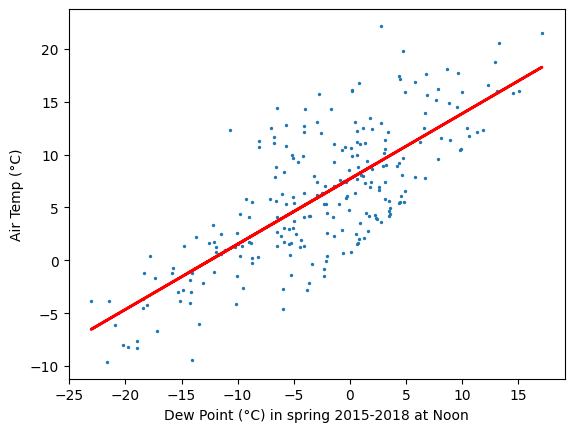

In [33]:
# plot linear regression
dp15_18 = df15_18_noon['Dew Point (°C)']
temp15_18_noon = df15_18_noon['Air Temp (°C)']

# convert to 2-D array
dp15_18 = dp15_18.to_numpy().reshape(-1,1)
temp15_18_noon = temp15_18_noon.to_numpy().reshape(-1,1)

#make the model
model = LinearRegression()
model.fit(dp15_18,temp15_18_noon)
temp15_18_noon_pred = model.predict(dp15_18)


MSE= mean_squared_error(temp15_18_noon, temp15_18_noon_pred)
R2= r2_score(temp15_18_noon, temp15_18_noon_pred)

print (R2)
print (MSE)

plt.scatter(dp15_18, temp15_18_noon, s = 2)
plt.plot(dp15_18, temp15_18_noon_pred, color='red', linewidth=2)
plt.xlabel("Dew Point (°C) in spring 2015-2018 at Noon")
plt.ylabel("Air Temp (°C)")


0.7144638591327863
10.539228096788941


(array([-25., -20., -15., -10.,  -5.,   0.,   5.,  10.,  15.,  20.]),
 [Text(-25.0, 0, '−25'),
  Text(-20.0, 0, '−20'),
  Text(-15.0, 0, '−15'),
  Text(-10.0, 0, '−10'),
  Text(-5.0, 0, '−5'),
  Text(0.0, 0, '0'),
  Text(5.0, 0, '5'),
  Text(10.0, 0, '10'),
  Text(15.0, 0, '15'),
  Text(20.0, 0, '20')])

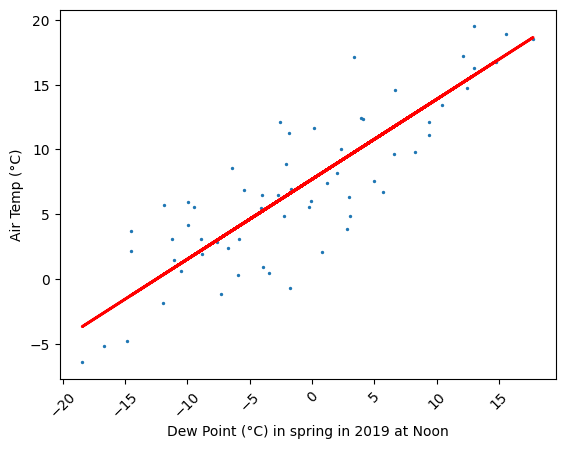

In [34]:
##Plot dates by temps for 2019
df2019_noon = df2019[df2019["Time"]== '12:00:00']
dp2019_noon = df2019_noon['Dew Point (°C)']
temp2019_noon = df2019_noon['Air Temp (°C)']

# date2020_noon = pre2020_noon.astype(str)
# date2020_noon = date2020_noon.str.split("-").str[-1].astype(int)
dp2019_noon = dp2019_noon.to_numpy().reshape(-1,1)
temp2019_noon = temp2019_noon.to_numpy().reshape(-1,1)
temp2019_noon_pred = model.predict(dp2019_noon)

MSE= mean_squared_error(temp2019_noon, temp2019_noon_pred)
R2= r2_score(temp2019_noon, temp2019_noon_pred)

print (R2)
print (MSE)

plt.scatter(dp2019_noon, temp2019_noon, s = 2)
plt.plot(dp2019_noon, temp2019_noon_pred, color='red', linewidth=2)
plt.xlabel("Dew Point (°C) in spring in 2019 at Noon")
plt.ylabel("Air Temp (°C)")
plt.xticks(rotation=45)